I found a dataset on customer satisfaction ratings for airlines I thought could be interesting to work with. You can find the dataset <a href="https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction?select=train.csv"> on Kaggle.</a> 

You can also find the file in assets/airline_csat.csv
<br><br>
Let's start by taking a look at the dataset.
<br><br>
**Note:** I'm on a Windows machine doing this so you may need to change the file path to r'assets\airline_csat.csv' or 'assets/airline_csat.csv' depending on the OS you're using.

![](assets/column_explanations.png)

In [2]:
import pandas as pd
import numpy as np

# Let's start by taking a look at the dataset.  
# Note: I'm on a Windows machine doing this so you may 
# need to change the file path to r'assets\airline_csat.csv' 
# or 'assets/airline_csat.csv' depending on the OS you're using.

df = pd.read_csv("assets\\airline_csat.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


There are already a few questions that would be interesting to answer here.
- Is customer satisfaction higher/lower depending on flight distance?
- Is customer satisfaction higher/lower depending on Class?
- Is customer satisfaction higher/lower depending on Age?
- Is customer satisfaction higher/lower depending on Gender?
- Is customer satisfaction higher/lower depending on Type of Travel?
- Is customer satisfaction higher/lower depending on Departure Delays?
- Is customer satisfaction higher/lower depending on Arrival Delays?
- How was the food? (very important question)

In [3]:
# First let's get rid of the first column since it seems like a duplicate of the index anyway.
df.drop("Unnamed: 0", axis=1, inplace=True)
# Then let's get some descriptive statistics to see what's going on in the dataset a little bit.
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [4]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.\
\nThere are {len(df['id'].unique())} unique values in the 'id' column so it doesn't appear we have any duplicate data.")

The dataset has 103904 rows and 24 columns.
There are 103904 unique values in the 'id' column so it doesn't appear we have any duplicate data.


In [5]:
# Let's see how the satisfaction rankings are used in the dataset.
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [6]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
ranks = df[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]
ranks

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1


In [8]:
ranks.iloc[0].mean()

3.857142857142857

In [9]:
ranks.iloc[2].mean()

3.7142857142857144

Hmmm.  Strange ranking system for satisfaction.  In my mind neutral isn't necessarily dissatisfied. I suppose if you're trying to wow your customers anything short of that could read as dissatisfaction.  I wonder if the satisfaction of customers was asked in the survey or if it was calculated by the rankings 1-5 in the other columns.  Let's roll with it for now and find out the dissatisfied and satisfied proportions to get a sense of what we're dealing with.
<br><br>
Ok, let's do some EDA...

Dissatisfied Customers: 58,697
Satisfied Customers: 44,897


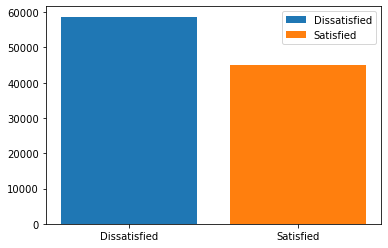

In [10]:
from matplotlib import pyplot as plt
print(f"Dissatisfied Customers: {len(df.where(df['satisfaction'] == 'neutral or dissatisfied').dropna()):,}")
print(f"Satisfied Customers: {len(df.where(df['satisfaction'] == 'satisfied').dropna()):,}")

plt.bar('Dissatisfied', len(df.where(df['satisfaction'] == 'neutral or dissatisfied').dropna()), label="Dissatisfied")
plt.bar('Satisfied', len(df.where(df['satisfaction'] == 'satisfied').dropna()), label="Satisfied")
plt.legend()

Female Customers: 52,576
Male Customers: 51,018


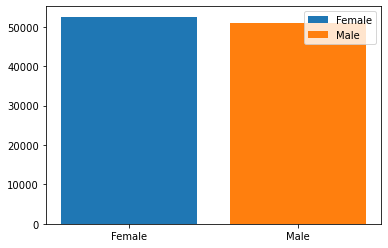

In [11]:
print(f"Female Customers: {len(df.where(df['Gender'] == 'Female').dropna()):,}")
print(f"Male Customers: {len(df.where(df['Gender'] == 'Male').dropna()):,}")

plt.bar("Female", len(df.where(df['Gender'] == 'Female').dropna()), label="Female")
plt.bar("Male", len(df.where(df['Gender'] == 'Male').dropna()), label="Male")
plt.legend()

KeyboardInterrupt: 

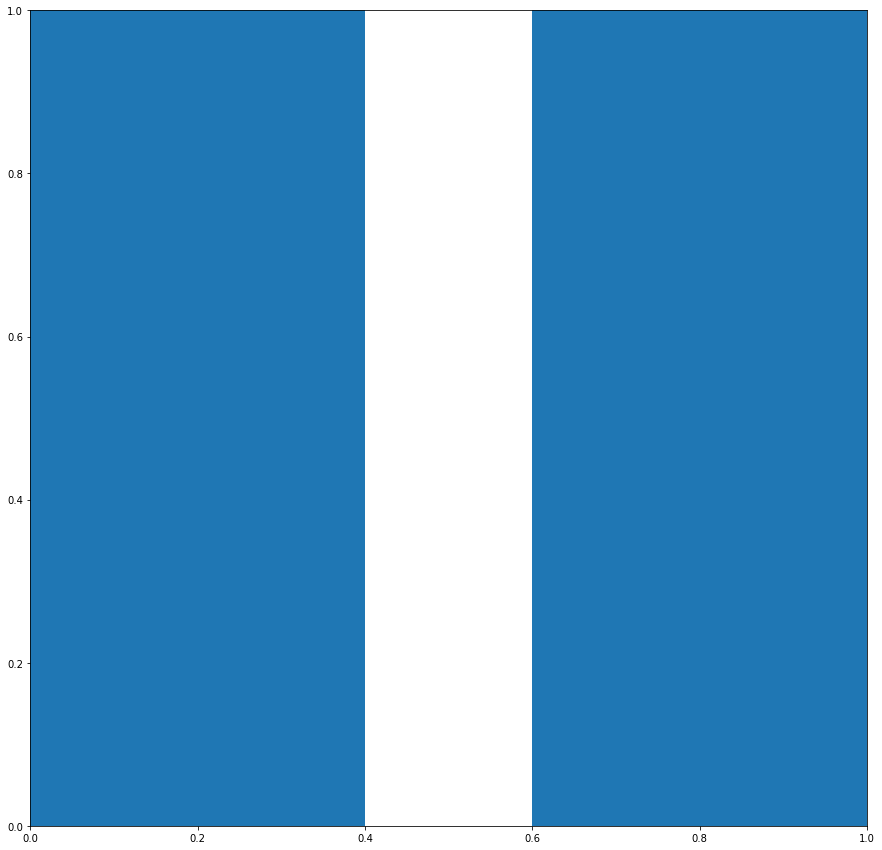

In [12]:
plt.figure(figsize=(15, 15))
plt.bar(df.index, df['Age'])
#plt.plot(df.index, df['Satisfaction'])

In [86]:
df.index

RangeIndex(start=0, stop=103904, step=1)

Since we're using Jupyter Notebook we'll need to install some packages using the Anaconda Prompt.

First enter **conda install dash** into Anaconda Prompt

To make Dash work in Jupyter Notebooks, we'll also need to install Jupyter-Dash.<br>
More info on this package can be found [here](https://community.plotly.com/t/announcing-jupyterdash/39800) or on their [GitHub page](https://github.com/plotly/jupyter-dash).
<br>
**conda install -c conda-forge -c plotly jupyter-dash**  

**pip install dash-bootstrap-components**

Below we'll use a simple example from the <a href="https://dash.plotly.com/layout">Dash documentation</a> just to show a simple example.  I had to alter some of the copied code to make Dash work with Jupyter Notbooks.<br><br>
**Note:  This is going to run a local host in debug mode.  This allows the site to refresh while you make changes to your code but you should  <br>NEVER USE THIS IN PRODUCTION WITH DEBUG SET TO 'True'.**

In [17]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

# Since we're using Jupyter, we need to import this as well.
from jupyter_dash import JupyterDash

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# This example is from the original Dash documentation.
# If you are using a regular IDE with a normal Python distribution (not anaconda), then you can use this line.
# app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# Since we're using Jupyter Notebooks We'll need to use this.
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

Dash app running on http://127.0.0.1:8050/


[Click the link provided in the output](http://127.0.0.1:8050/) or copy the url and past it into a new browser window.  The chart should look something like this below...

![](assets/Hello_Dash_Example.png)

## Building Your Own
Ok, now that we have installed all the necessary packages and we've tested that they are working, let's get to work on one of our own.
<br><br>

In [1]:
# Let's get all our import statements in one place...
# It may also be a good idea to just restart the kernel in your notbook so we're starting fresh.
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
import numpy as np

# Since we're using Jupyter, we need to import this as well.
from jupyter_dash import JupyterDash

import plotly.graph_objects as go

In [2]:
# Let's reload the data and clean it so we have it available

df = pd.read_csv("assets\\airline_csat.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Dash is built by the folks over at Plotly, so let's build a simple plotly plot using our airline data to get started.

In [13]:

age = df['Age'].value_counts()

age_fig = px.bar(df,
             x=df['Age'].value_counts().sort_index().index,
             y=df['Age'].value_counts().sort_index())


In [14]:
age_fig

That's fine but our hover over is showing "x" and "y" and it would make more sense if they said "Age" and "Total Number".  So let's do this a bit differently.

In [15]:
# fig = go.Figure()
# fig.add_trace(go.Bar(age.sort_index().index, y=age.sort_index(), name='Age'))
# fig.add_trace(go.Bar(age.sort_index().index, y=age.sort_index(), name='Total Number'))


age_fig = px.bar(df,
             x=df['Age'].value_counts().sort_index().index,
             y=df['Age'].value_counts().sort_index(),
             labels={'x':'Age', 'y':'Total Count'},
             title="Number of Passengers by Age"
            )
age_fig

In [6]:

# # Some bootstrap CSS 
# external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# # Initialize the app
# app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

# if __name__ == '__main__':
#     app.run_server(debug=True)

In [16]:
# Some bootstrap CSS 
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# Initialize the app
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout= html.Div(children=[
    html.H1(children='Your first dashboard!'),
    
    html.Div(children="""
    You can do anything if you read the documentation.
    """),
    
    dcc.Graph(
        id='age-graph',
        figure=age_fig
    )
])


if __name__ == '__main__':
    app.run_server(debug=True)

Dash app running on http://127.0.0.1:8050/


Look at the tab you created for your dashboard earlier and you should see the changes updated automatically which should look something like this...

![](assets/first_dashboard.png)

Well, it's nothing to write home about yet but let's add another graph.  By adding another graph it will become more apparent how Dash can be used to created web based interactive dashboards.

In [17]:
gender_fig = px.bar(df,
                    x=df['Gender'].unique(),
                    y=df['Gender'].value_counts(),
                    labels={'x':'Gender', 'y':'Total Count'},
                    title="Number of Passengers by Gender"
                   )
gender_fig

Ok, simple chart I know but let's just use it to show how to add multiple charts to a dashboard using Dash.

In [18]:
# Some bootstrap CSS 
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# Initialize the app
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout= html.Div(children=[
    html.H1(children='Your first dashboard!'),
    
    html.Div(children="""
    You can do anything if you read the documentation.
    """),
    
    dcc.Graph(
        id='age-graph',
        figure=age_fig
    ),
    
    dcc.Graph(
        id='gender-graph',
        figure=gender_fig
    )
])


if __name__ == '__main__':
    app.run_server(debug=True)

Dash app running on http://127.0.0.1:8050/


We now have two interactive graphs simultaneously being displayed in one webpage.  My friends, we've only just scratched the surface of what Plotly and Dash can do.

Now, what if we want these graphs to appear side by side in the dashboard?

In [19]:
# Some bootstrap CSS 
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# Initialize the app
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout=html.Div(className='row', children=[
    html.H1(children='Your first dashboard!'),
    html.Div(children="""You can do anything if you read the docs."""),
    
    html.Div(children=[
        dcc.Graph(id='age-graph', figure=age_fig, style={'display': 'inline-block', 'width': '49%'}),
        dcc.Graph(id='gender-graph', figure=gender_fig, style={'display': 'inline-block', 'width': '49%'})
    
])
])



if __name__ == '__main__':
    app.run_server(debug=True)

Dash app running on http://127.0.0.1:8050/


In [20]:
# some references for the above
# https://community.plotly.com/t/help-with-displaying-two-graphs-in-1-row-2-columns/17132
# https://stackoverflow.com/questions/45490002/how-to-use-dash-within-jupyter-notebook-or-jupyterlab


![](assets/side_by_side_graphs.png)


Ok, now that we've seen some of the HTML components in action and how we can use them to change the layout, let's look closer at some of the Dash Core Components.  Specifically, callbacks.


In [24]:
# To do this we'll need to import a couple more things
from dash.dependencies import Input, Output

# Some bootstrap CSS 
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# Initialize the app
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout=html.Div(className='greeting', children=[
    html.H1(children='Your first dashboard!'),
    html.Div(children="""You can do anything if you read the docs."""),
    
    # In this HTML div element we're going to place our graphs side by side.
    html.Div(className='age-and-gender-graph-row', children=[
        dcc.Graph(id='age-graph', figure=age_fig, style={'display': 'inline-block', 'width': '49%'}),
        dcc.Graph(id='gender-graph', figure=gender_fig, style={'display': 'inline-block', 'width': '49%'})
    ]),
    
    
    # We'll add a div object for the input box
    html.Div(["Input: ",
              dcc.Input(id='some-input',
                        value='initial value', # can be anything you want and will be the inital value for the input
                        type='text'
                       )
             ]),
    # Just adding an HTML line break for better separation between elements.
    html.Br(),
    
    # Adding another div element for the output box
    html.Div(id='some-output')
])


# Decorator to create the call back
@app.callback(
    Output(component_id='some-output', component_property='children'),
    [Input(component_id='some-input', component_property='value')] 
)

# Function to change the output text
def update_output_div(input_value):
    return 'Output: {}'.format(input_value)


if __name__ == '__main__':
    app.run_server(debug=True)

Dash app running on http://127.0.0.1:8050/


Now, test it out.  You should be able to change 'initial text' to whatever you want... like 'Hello World'.

![](assets\input_box_example.png)

Ok, you get the point but that's not all that useful.  Let's instead look at how we can change the Passengers by Age chart based on hover over in the Gender chart.  The goal here would be to filter the Age chart by Gender.

In [39]:
# Let's get all our import statements in one place...
# It may also be a good idea to just restart the kernel in your notbook so we're starting fresh.
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
import numpy as np

# Since we're using Jupyter, we need to import this as well.
from jupyter_dash import JupyterDash

import plotly.graph_objects as go

# Let's reload the data and clean it so we have it available

df = pd.read_csv("assets\\airline_csat.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)



# We don't need this here anymore since the age_fig is getting created/updated in the update_graph() function.
# age_fig = px.bar(df,
#              x=df['Age'].value_counts().sort_index().index,
#              y=df['Age'].value_counts().sort_index(),
#              labels={'x':'Age', 'y':'Total Count'},
#              title="Number of Passengers by Age"
#             )

gender_fig = px.bar(df,
                    x=df['Gender'].unique(),
                    y=df['Gender'].value_counts(),
                    labels={'x':'Gender', 'y':'Total Count'},
                    title="Number of Passengers by Gender"
                   )


#_________________________________________________________________________________________________________________
# To do this we'll need to import a couple more things
from dash.dependencies import Input, Output

# Some bootstrap CSS 
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# Initialize the app
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout=html.Div(className='greeting', children=[
    html.H1(children='Your first dashboard!'),
    html.Div(children="""You can do anything if you read the docs."""),
    
    # In this HTML div element we're going to place our graphs side by side.
    html.Div(className='age-and-gender-graph-row', children=[
        dcc.Graph(id='age-graph', figure=age_fig, style={'display': 'inline-block', 'width': '49%'}),
        dcc.Graph(id='gender-graph', figure=gender_fig, style={'display': 'inline-block', 'width': '49%'})
    ]),
])

@app.callback(Output('age-graph', 'figure'),
              [Input('gender-graph', 'hoverData')]
             )

def update_graph(hoverData):
    # If we haven't hovered over a gender, we just want both so we'll create the original
    # Age graph here.
    if hoverData==None:
        age_fig = px.bar(df,
             x=df['Age'].value_counts().sort_index().index,
             y=df['Age'].value_counts().sort_index(),
             labels={'x':'Age', 'y':'Total Count'},
             title="Number of Passengers by Age"
            )
        return age_fig
    
    # If we do get a hover over on gender, we update the way the graph is made to reflect the hover over.
    # To explain the hoverData['points'][0]['x']...
    # hoverData returns a dictionary, so we're pulling out the value of the 'x' key
    # to be passed to the graph which would be either 'Male' or 'Female' 
    # and we're slicing the df on those values
    else:
        age_fig = px.bar(df,
                 x=df['Age'].where(df['Gender'] == hoverData['points'][0]['x']).value_counts().sort_index().index,
                 y=df['Age'].where(df['Gender'] == hoverData['points'][0]['x']).value_counts().sort_index(),
                 labels={'x':'Age', 'y':'Total Count'},
                 title="Number of Passengers by Age"
                )
        # Uncomment to see the 'x' values when you hover over
        # print(hoverData['points'][0]['x'])
        # Uncomment to see the hoverData dictionary being printed on hover over
        # print(hoverData['points'])
        
        # Then we just return the age_fig back to the div element above in the app.layout
        return age_fig


if __name__ == '__main__':
    app.run_server(debug=True)

Dash app running on http://127.0.0.1:8050/


Ok, we can now slice the customers' ages by gender.  That's interesting but we're exploring a customer satisfaction dataset so it's probably not all that useful outside of learning how to change graphs on hover over.
<br><br>
So let's reconfigure the dashboard into something that's a little more useful for decision makers etc.

In [40]:
# Let's get all our import statements in one place...
# It may also be a good idea to just restart the kernel in your notbook so we're starting fresh.
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Since we're using Jupyter, we need to import this as well.
from jupyter_dash import JupyterDash




# Let's reload the data and clean it so we have it available
df = pd.read_csv("assets\\airline_csat.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)




In [41]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [43]:
satisfaction_figure = px.line(df, x='index', y=df[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']])
satisfaction_figure

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction'] but received: index
 To use the index, pass it in directly as `df.index`.

In [83]:
# satisfaction_figure = go.Figure()
# satisfaction_figure.add_trace(go.Scatter(x=df['Baggage handling'].sort_index().index, y=df['Baggage handling'].sort_index()))

satisfaction_figure = px.bar(x=['Inflight wifi service','Departure/Arrival time convenient', 
                                'Ease of Online booking', 'Gate location', 'Food and drink', 
                                'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                                'On-board service', 'Leg room service','Baggage handling', 
                                'Checkin service', 'Inflight service','Cleanliness'
                               ],
                             
#                              y=[np.mean(df[['Inflight wifi service','Departure/Arrival time convenient', 
#                                             'Ease of Online booking','Gate location', 'Food and drink', 
#                                             'Online boarding', 'Seat comfort','Inflight entertainment', 
#                                             'On-board service', 'Leg room service','Baggage handling', 
#                                             'Checkin service', 'Inflight service','Cleanliness']
                             
                             y=[df[['Inflight wifi service','Departure/Arrival time convenient', 
                                            'Ease of Online booking','Gate location', 'Food and drink', 
                                            'Online boarding', 'Seat comfort','Inflight entertainment', 
                                            'On-board service', 'Leg room service','Baggage handling', 
                                            'Checkin service', 'Inflight service','Cleanliness']].agg(np.mean),
                                          
                               ],
                             #labels={'x':'Age', 'y':'Total Count'}
                             labels={'x':'Type of Service', 'y':'Average Score'}
                            )
satisfaction_figure.update_layout(yaxis_title='Average Score')

In [85]:
satisfaction_figure = go.Figure()
satisfaction_figure.add_trace(go.Bar(
    x = ['Inflight wifi service'],
    y = np.array(df['Inflight wifi service'].agg(np.mean)),
    name='Inflight wifi service'
))

In [90]:
csat_cols = ['Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
             'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
             'Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 
             'Checkin service', 'Inflight service','Cleanliness']

def create_csat_bar(columns):
    figure = go.Figure()
    for col in columns:
        figure.add_trace(go.Bar(
        x = [col],
        y = np.array(df[col].agg(np.mean)),
        name= col
        ))
    figure.update_layout(title='Customer Satisfaction Rating By Service', yaxis_title='Average Score')
    return figure

satisfaction_figure = create_csat_bar(csat_cols)
satisfaction_figure

In [42]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Great, something management is probably going to care more about.  Let's rearrange our dashboard in Dash and put this new graph at the top and our other two graphs below in a new row.

Here's where we left off in the last step...

In [ ]:
# Let's get all our import statements in one place...
# It may also be a good idea to just restart the kernel in your notbook so we're starting fresh.
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
import numpy as np

# Since we're using Jupyter, we need to import this as well.
from jupyter_dash import JupyterDash

import plotly.graph_objects as go

# Let's reload the data and clean it so we have it available

df = pd.read_csv("assets\\airline_csat.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)



# We don't need this here anymore since the age_fig is getting created/updated in the update_graph() function.
# age_fig = px.bar(df,
#              x=df['Age'].value_counts().sort_index().index,
#              y=df['Age'].value_counts().sort_index(),
#              labels={'x':'Age', 'y':'Total Count'},
#              title="Number of Passengers by Age"
#             )

gender_fig = px.bar(df,
                    x=df['Gender'].unique(),
                    y=df['Gender'].value_counts(),
                    labels={'x':'Gender', 'y':'Total Count'},
                    title="Number of Passengers by Gender"
                   )


#_________________________________________________________________________________________________________________
# To do this we'll need to import a couple more things
from dash.dependencies import Input, Output

# Some bootstrap CSS 
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# Initialize the app
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout=html.Div(className='greeting', children=[
    html.H1(children='Your first dashboard!'),
    html.Div(children="""You can do anything if you read the docs."""),
    
    # In this HTML div element we're going to place our graphs side by side.
    html.Div(className='age-and-gender-graph-row', children=[
        dcc.Graph(id='age-graph', figure=age_fig, style={'display': 'inline-block', 'width': '49%'}),
        dcc.Graph(id='gender-graph', figure=gender_fig, style={'display': 'inline-block', 'width': '49%'})
    ]),
])

@app.callback(Output('age-graph', 'figure'),
              [Input('gender-graph', 'hoverData')]
             )

def update_graph(hoverData):
    # If we haven't hovered over a gender, we just want both so we'll create the original
    # Age graph here.
    if hoverData==None:
        age_fig = px.bar(df,
             x=df['Age'].value_counts().sort_index().index,
             y=df['Age'].value_counts().sort_index(),
             labels={'x':'Age', 'y':'Total Count'},
             title="Number of Passengers by Age"
            )
        return age_fig
    
    # If we do get a hover over on gender, we update the way the graph is made to reflect the hover over.
    # To explain the hoverData['points'][0]['x']...
    # hoverData returns a dictionary, so we're pulling out the value of the 'x' key
    # to be passed to the graph which would be either 'Male' or 'Female' 
    # and we're slicing the df on those values
    else:
        age_fig = px.bar(df,
                 x=df['Age'].where(df['Gender'] == hoverData['points'][0]['x']).value_counts().sort_index().index,
                 y=df['Age'].where(df['Gender'] == hoverData['points'][0]['x']).value_counts().sort_index(),
                 labels={'x':'Age', 'y':'Total Count'},
                 title="Number of Passengers by Age"
                )
        # Uncomment to see the 'x' values when you hover over
        # print(hoverData['points'][0]['x'])
        # Uncomment to see the hoverData dictionary being printed on hover over
        # print(hoverData['points'])
        
        # Then we just return the age_fig back to the div element above in the app.layout
        return age_fig


if __name__ == '__main__':
    app.run_server(debug=True)

In [2]:
# Let's get all our import statements in one place...
# It may also be a good idea to just restart the kernel in your notbook so we're starting fresh.
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
import numpy as np

# Since we're using Jupyter, we need to import this as well.
from jupyter_dash import JupyterDash

import plotly.graph_objects as go

# Let's reload the data and clean it so we have it available

df = pd.read_csv("assets\\airline_csat.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)



# We don't need this here anymore since the age_fig is getting created/updated in the update_graph() function.
age_fig = px.bar(df,
             x=df['Age'].value_counts().sort_index().index,
             y=df['Age'].value_counts().sort_index(),
             labels={'x':'Age', 'y':'Total Count'},
             title="Number of Passengers by Age"
            )

gender_fig = px.bar(df,
                    x=df['Gender'].unique(),
                    y=df['Gender'].value_counts(),
                    labels={'x':'Gender', 'y':'Total Count'},
                    title="Number of Passengers by Gender"
                   )


#_________________________________________________________________________________________________________________

# Adding the new graph code here:

csat_cols = ['Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
             'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
             'Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 
             'Checkin service', 'Inflight service','Cleanliness']

def create_csat_bar(columns):
    figure = go.Figure()
    for col in columns:
        figure.add_trace(go.Bar(
        x = [col],
        y = np.array(df[col].agg(np.mean)),
        name= col
        ))
    figure.update_layout(title='Customer Satisfaction Rating By Service', yaxis_title='Average Score')
    return figure

satisfaction_figure = create_csat_bar(csat_cols)


#_________________________________________________________________________________________________________________
# To do this we'll need to import a couple more things
from dash.dependencies import Input, Output

# Some bootstrap CSS 
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# Initialize the app
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout=html.Div(className='greeting', children=[
    html.H1(children='Your first dashboard!'),
    html.Div(children="""You can do anything if you read the docs."""),
    
    # Adding a new div for the new customer satisfaction ratings graph
    html.Div(className='csat-row',
             children=[
                 dcc.Graph(id='csat-graph', figure=satisfaction_figure)
             ]
            ),
    
    # In this HTML div element we're going to place our graphs side by side.
    html.Div(className='age-and-gender-graph-row', children=[
        dcc.Graph(id='age-graph', figure=age_fig, style={'display': 'inline-block', 'width': '49%'}),
        dcc.Graph(id='gender-graph', figure=gender_fig, style={'display': 'inline-block', 'width': '49%'})
    ]),
])


# Call back to change the customer by age graph according to gender upon hover over
@app.callback(Output('age-graph', 'figure'),
              [Input('gender-graph', 'hoverData')]
             )

def update_graph(hoverData):
    # If we haven't hovered over a gender, we just want both so we'll create the original
    # Age graph here.
    if hoverData==None:
        age_fig = px.bar(df,
             x=df['Age'].value_counts().sort_index().index,
             y=df['Age'].value_counts().sort_index(),
             labels={'x':'Age', 'y':'Total Count'},
             title="Number of Passengers by Age"
            )
        return age_fig
    
    # If we do get a hover over on gender, we update the way the graph is made to reflect the hover over.
    # To explain the hoverData['points'][0]['x']...
    # hoverData returns a dictionary, so we're pulling out the value of the 'x' key
    # to be passed to the graph which would be either 'Male' or 'Female' 
    # and we're slicing the df on those values
    else:
        age_fig = px.bar(df,
                 x=df['Age'].where(df['Gender'] == hoverData['points'][0]['x']).value_counts().sort_index().index,
                 y=df['Age'].where(df['Gender'] == hoverData['points'][0]['x']).value_counts().sort_index(),
                 labels={'x':'Age', 'y':'Total Count'},
                 title="Number of Passengers by Age"
                )
        # Uncomment to see the 'x' values when you hover over
        # print(hoverData['points'][0]['x'])
        # Uncomment to see the hoverData dictionary being printed on hover over
        # print(hoverData['points'])
        
        # Then we just return the age_fig back to the div element above in the app.layout
        return age_fig





if __name__ == '__main__':
    app.run_server(debug=True)

OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.

Great!  We now have two rows of graphs.  Your dashboard should look like this...

![](assets/two_rows.png)

One other really neat thing about Dash is that, like Jupyter Notebook, it supports Markdown. So we can put a markdown indicator next to our Customer Satisfaction Rating by Service graph to indicate our overall customer satisfaction score.  Let's start that now.

In [1]:
# Let's get all our import statements in one place...
# It may also be a good idea to just restart the kernel in your notbook so we're starting fresh.
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
import numpy as np

# Since we're using Jupyter, we need to import this as well.
from jupyter_dash import JupyterDash

import plotly.graph_objects as go
import dash_bootstrap_components as dbc

# Let's reload the data and clean it so we have it available

df = pd.read_csv("assets\\airline_csat.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)




age_fig = px.bar(df,
             x=df['Age'].value_counts().sort_index().index,
             y=df['Age'].value_counts().sort_index(),
             labels={'x':'Age', 'y':'Total Count'},
             title="Number of Passengers by Age"
            )

gender_fig = px.bar(df,
                    x=df['Gender'].unique(),
                    y=df['Gender'].value_counts(),
                    labels={'x':'Gender', 'y':'Total Count'},
                    title="Number of Passengers by Gender"
                   )


#_________________________________________________________________________________________________________________

# Adding the new graph code here:

csat_cols = ['Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
             'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
             'Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 
             'Checkin service', 'Inflight service','Cleanliness']

def create_csat_bar(columns):
    figure = go.Figure()
    for col in columns:
        figure.add_trace(go.Bar(
        x = [col],
        y = np.array(df[col].agg(np.mean)),
        name= col
        ))
    figure.update_layout(title='Customer Satisfaction Rating By Service', yaxis_title='Average Score')
    return figure

satisfaction_figure = create_csat_bar(csat_cols)

simple_text = """
## Trial
You suck!
"""

#_________________________________________________________________________________________________________________
# To do this we'll need to import a couple more things
from dash.dependencies import Input, Output

# Some bootstrap CSS 
#external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# Initialize the app
app = JupyterDash(__name__)#, external_stylesheets=external_stylesheets)

app.layout=html.Div(className='greeting', children=[
    html.H1(children='Your first dashboard!'),
    html.Div(children="""You can do anything if you read the docs."""),
    
    

    html.Div(className='csat-row',
             children=[
                 dcc.Graph(id='csat-graph', figure=satisfaction_figure, 
                           style={'display':'inline-block', 'width':'80%'}),
                 
                 
                 dcc.Markdown(children="""
                 # avg-csat
                 **This** is getting on my nerves.
                 Going to see.  
                 How many,  
                 lines  
                 we  
                 need
                 """, id='avg-csat', 
                              style={'display':'inline-block', 'width':'20%', 
                                     'textAlign':'center', 'justify-content':'center', 'top':'0px'}),

             ]
    ),
    
    #Adding a new div for the new customer satisfaction ratings graph
    html.Div(className='csat-row',
             children=[
                 dcc.Graph(id='csat-graph', figure=satisfaction_figure, 
                           style={'display':'inline-block', 'width':'80%'}),
                 
                 dcc.Markdown(children='avg-csat', id='avg-csat', style={'display':'inline-block', 'width':'20%'})
             ], 
            ),
    
    

    
    # In this HTML div element we're going to place our graphs side by side.
    html.Div(className='age-and-gender-graph-row', children=[
        dcc.Graph(id='age-graph', figure=age_fig, style={'display': 'inline-block', 'width': '80%'}),
        dcc.Graph(id='gender-graph', figure=gender_fig, style={'display': 'inline-block', 'width': '20%'})
    ]),
    
    html.Div(
        dcc.Markdown(children="""
        # I am annoyed.  
        Trying this out again.
        """)
    )
])


# Call back to change the customer by age graph according to gender upon hover over
@app.callback(Output('age-graph', 'figure'),
              [Input('gender-graph', 'hoverData')]
             )

def update_graph(hoverData):
    # If we haven't hovered over a gender, we just want both so we'll create the original
    # Age graph here.
    if hoverData==None:
        age_fig = px.bar(df,
             x=df['Age'].value_counts().sort_index().index,
             y=df['Age'].value_counts().sort_index(),
             labels={'x':'Age', 'y':'Total Count'},
             title="Number of Passengers by Age"
            )
        return age_fig
    
    # If we do get a hover over on gender, we update the way the graph is made to reflect the hover over.
    # To explain the hoverData['points'][0]['x']...
    # hoverData returns a dictionary, so we're pulling out the value of the 'x' key
    # to be passed to the graph which would be either 'Male' or 'Female' 
    # and we're slicing the df on those values
    else:
        age_fig = px.bar(df,
                 x=df['Age'].where(df['Gender'] == hoverData['points'][0]['x']).value_counts().sort_index().index,
                 y=df['Age'].where(df['Gender'] == hoverData['points'][0]['x']).value_counts().sort_index(),
                 labels={'x':'Age', 'y':'Total Count'},
                 title="Number of Passengers by Age"
                )
        # Uncomment to see the 'x' values when you hover over
        # print(hoverData['points'][0]['x'])
        # Uncomment to see the hoverData dictionary being printed on hover over
        # print(hoverData['points'])
        
        # Then we just return the age_fig back to the div element above in the app.layout
        return age_fig


# @app.callback(Output('avg-csat', 'children'),
#               [Input('csat-graph','hoverData')])

# def update_avg_csat_text(hoverData):
#     print(hoverData['points'])
#     avg_csat_for_category = hoverData['points'][0]['y']
#     print(hoverData['points'][0]['y'])
    
#     avg_satisfaction_all = df[csat_cols].agg(np.mean)
    
#     output_text = """
#     Average Satisfaction: {}
#     Satisfaction by Service: {avg_csat_for_category}
#     """.format(avg_satisfaction_all, avg_csat_for_category)
    
#     return output_text


if __name__ == '__main__':
    app.run_server(debug=True)

OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.

In [1]:
# https://dash-bootstrap-components.opensource.faculty.ai/docs/components/layout/
# for row column info

In [4]:
df = pd.read_csv("assets\\airline_csat.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

csat_cols = ['Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
             'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
             'Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 
             'Checkin service', 'Inflight service','Cleanliness']


np.mean(df[csat_cols].agg(np.mean))


3.2407242674556733